<a href="https://colab.research.google.com/github/iwatake2222/study_karaage_ai/blob/master/karaage_ai_04_00_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf "datasets"

In [ ]:
!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf datasets/.git/
!rm datasets/LICENSE

dataset_original_dir = 'datasets'

Cloning into 'datasets'...
remote: Enumerating objects: 210, done.
remote: Total 210 (delta 0), reused 0 (delta 0), pack-reused 210
Receiving objects: 100% (210/210), 4.60 MiB | 34.36 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
train_aug_dir = dataset_original_dir

In [ ]:
import cv2
import numpy as np
import sys
import os
import glob

In [ ]:
# ヒストグラム均一化
def equalizeHistRGB(src):
    RGB = cv2.split(src)
    Blue   = RGB[0]
    Green = RGB[1]
    Red    = RGB[2]
    for i in range(3):
        cv2.equalizeHist(RGB[i])

    img_hist = cv2.merge([RGB[0],RGB[1], RGB[2]])
    return img_hist

# ガウシアンノイズ
def addGaussianNoise(src):
    row,col,ch= src.shape
    mean = 0
    var = 0.1
    sigma = 15
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = src + gauss

    return noisy

# salt&pepperノイズ
def addSaltPepperNoise(src):
    row,col,ch = src.shape
    s_vs_p = 0.5
    amount = 0.004
    out = src.copy()
    # Salt mode
    num_salt = np.ceil(amount * src.size * s_vs_p)
    coords = [np.random.randint(0, i-1 , int(num_salt))
                 for i in src.shape]
    out[coords[:-1]] = (255,255,255)

    # Pepper mode
    num_pepper = np.ceil(amount* src.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i-1 , int(num_pepper))
             for i in src.shape]
    out[coords[:-1]] = (0,0,0)

    return out

# ルックアップテーブルの生成
min_table = 50
max_table = 205
diff_table = max_table - min_table
gamma1 = 0.75
gamma2 = 1.5

LUT_HC = np.arange(256, dtype = 'uint8')
LUT_LC = np.arange(256, dtype = 'uint8')
LUT_G1 = np.arange(256, dtype = 'uint8')
LUT_G2 = np.arange(256, dtype = 'uint8')

LUTs = []

# 平滑化用
average_square = (10,10)

# ハイコントラストLUT作成
for i in range(0, min_table):
  LUT_HC[i] = 0

for i in range(min_table, max_table):
  LUT_HC[i] = 255 * (i - min_table) / diff_table

for i in range(max_table, 255):
  LUT_HC[i] = 255

# その他LUT作成
for i in range(256):
  LUT_LC[i] = min_table + i * (diff_table) / 255
  LUT_G1[i] = 255 * pow(float(i) / 255, 1.0 / gamma1)
  LUT_G2[i] = 255 * pow(float(i) / 255, 1.0 / gamma2)

LUTs.append(LUT_HC)
LUTs.append(LUT_LC)
LUTs.append(LUT_G1)
LUTs.append(LUT_G2)


labels = os.listdir(dataset_original_dir)

image_file_names = []

for label in labels:
  image_files = glob.glob(train_aug_dir + '/' + label +'/*')
  for image_file in image_files:
    image_file_names.append(image_file)

print(image_file_names)

for image_file in image_file_names:
#  print(image_file)
  # 画像の読み込み
  img_src = cv2.imread(image_file, 1)
  trans_img = []
  trans_img.append(img_src)

  # LUT変換
  for i, LUT in enumerate(LUTs):
    trans_img.append(cv2.LUT(img_src, LUT))

	# 平滑化
  trans_img.append(cv2.blur(img_src, average_square))

	# ヒストグラム均一化
  trans_img.append(equalizeHistRGB(img_src))

	# ノイズ付加
  trans_img.append(addGaussianNoise(img_src))
  trans_img.append(addSaltPepperNoise(img_src))

	# 反転
  flip_img = []
  for img in trans_img:
     flip_img.append(cv2.flip(img, 1))
  trans_img.extend(flip_img)

  dir_name =  os.path.splitext(os.path.dirname(image_file))[0]
  base_name =  os.path.splitext(os.path.basename(image_file))[0]
  img_src.astype(np.float64)
  
  for i, img in enumerate(trans_img):
    if i > 0:
      cv2.imwrite(dir_name + '/trans_' + base_name + '_' + str(i-1) + '.jpg' ,img)

['datasets/gu/IMG_0766.JPG', 'datasets/gu/IMG_0734.JPG', 'datasets/gu/IMG_0756.JPG', 'datasets/gu/IMG_0759.JPG', 'datasets/gu/IMG_0738.JPG', 'datasets/gu/IMG_0764.JPG', 'datasets/gu/IMG_0737.JPG', 'datasets/gu/IMG_0894.JPG', 'datasets/gu/IMG_0758.JPG', 'datasets/gu/IMG_0750.JPG', 'datasets/gu/IMG_0729.JPG', 'datasets/gu/IMG_0749.JPG', 'datasets/gu/IMG_0751.JPG', 'datasets/gu/IMG_0890.JPG', 'datasets/gu/IMG_0889.JPG', 'datasets/gu/IMG_0735.JPG', 'datasets/gu/IMG_0753.JPG', 'datasets/gu/IMG_0763.JPG', 'datasets/gu/IMG_0736.JPG', 'datasets/gu/IMG_0731.JPG', 'datasets/gu/IMG_0732.JPG', 'datasets/gu/IMG_0743.JPG', 'datasets/gu/IMG_0744.JPG', 'datasets/gu/IMG_0754.JPG', 'datasets/gu/IMG_0757.JPG', 'datasets/gu/IMG_0739.JPG', 'datasets/gu/IMG_0728.JPG', 'datasets/gu/IMG_0893.JPG', 'datasets/gu/IMG_0768.JPG', 'datasets/gu/IMG_0765.JPG', 'datasets/gu/IMG_0760.JPG', 'datasets/gu/IMG_0730.JPG', 'datasets/gu/IMG_0886.JPG', 'datasets/gu/IMG_0741.JPG', 'datasets/gu/IMG_0888.JPG', 'datasets/gu/IMG_07

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Reshape
from keras.layers.core import Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D, Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import numpy as np
from PIL import Image
import glob
import random
import time
import csv
import os

import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

Using TensorFlow backend.


In [ ]:
def image_batch(batch_size):
  files = [f for f in glob.glob(dataset_original_dir + "/*/*") if os.path.isfile(f)]
  files = random.sample(files, batch_size)
  res = []
  for path in files:
    img = Image.open(path)
    img = img.resize((64, 64))
    arr = np.array(img)
    arr = (arr - 127.5) / 127.5
    arr.resize((64, 64, 3))
    res.append(arr)
  return np.array(res)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


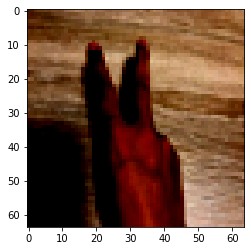

In [ ]:
plt.imshow(image_batch(25)[0])

In [ ]:
def combine_images(generated_images, cols=5, rows=5):
  shape = generated_images.shape
  h = shape[1]
  w = shape[2]
  image = np.zeros((rows * h, cols * w, 3))
  for index, img in enumerate(generated_images):
    if index >= cols * rows:
      break
    i = index // cols
    j = index % cols
    image[i * h : (i + 1) * h, j * w : (j + 1) * w, : ] = img[:, :, :]
  image = image * 127.5 + 127.5
  image = Image.fromarray(image.astype(np.uint8))
  return image

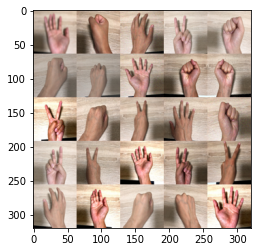

In [ ]:
plt.imshow(combine_images(image_batch(25)))

In [ ]:
BATCH_SIZE = 32
EPOCHS = 1001
MODEL_DIR = "./model"
GEN_IMAGE_DIR = "./gen_images"
EACH_STEP = 50
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(GEN_IMAGE_DIR, exist_ok=True)

In [ ]:
def generator_model():
  model = Sequential()
  model.add(Dense(1024, input_shape=(100,)))
  model.add(Activation("tanh"))
  model.add(Dense(128 * 16 * 16))
  model.add(BatchNormalization())
  model.add(Activation("tanh"))
  model.add(Reshape((16, 16, 128)))
  model.add(UpSampling2D(size=(2, 2)))
  model.add(Conv2D(64, (5, 5), padding="same"))
  model.add(Activation("tanh"))
  model.add(UpSampling2D(size=(2, 2)))
  model.add(Conv2D(3, (5,5), padding="same"))
  model.add(Activation("tanh"))
  return model  

In [ ]:
def discriminator_model():
  model = Sequential()
  model.add(Conv2D(64, (5, 5), input_shape=(64, 64, 3), padding="same"))
  model.add(Activation("tanh"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (5, 5)))
  model.add(Activation("tanh"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation("tanh"))
  model.add(Dense(1))
  model.add(Activation("sigmoid"))
  return model

In [ ]:
def generator_containing_discriminator(generator, discriminator):
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  return model

In [ ]:
def set_trainable(model, trainable):
  model.trainable = trainable
  for layer in model.layers:
    model.trainable = trainable

generator = generator_model()
discriminator = discriminator_model()
discriminator_on_generator = generator_containing_discriminator(generator, discriminator)

set_trainable(discriminator, True)
discriminator.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

set_trainable(discriminator, False)
discriminator_on_generator.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

print(generator.summary())
print(discriminator.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              103424    
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32768)             33587200  
_________________________________________________________________
batch_normalization_1 (Batch (None, 32768)             131072    
_________________________________________________________________
activation_2 (Activation)    (None, 32768)             0         
_________________________________________________________________
reshape_1 

/tensorflow-1.15.2/python3.7/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


  0%|          | 0/1001 [00:00<?, ?it/s]

/tensorflow-1.15.2/python3.7/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


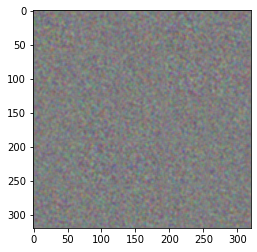

  0%|          | 1/1001 [00:06<1:41:27,  6.09s/it]/tensorflow-1.15.2/python3.7/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
  5%|▍         | 50/1001 [00:15<02:53,  5.48it/s]

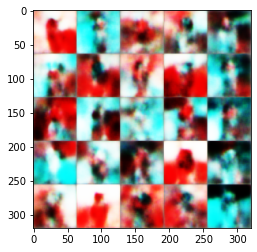

 10%|▉         | 100/1001 [00:24<02:45,  5.44it/s]

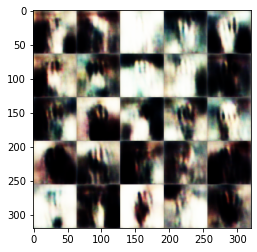

 15%|█▍        | 150/1001 [00:34<02:39,  5.34it/s]

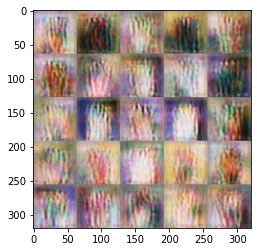

 20%|█▉        | 200/1001 [00:43<02:30,  5.32it/s]

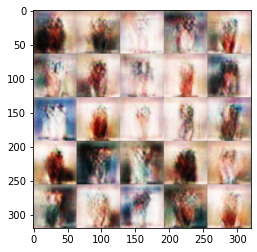

 25%|██▍       | 250/1001 [00:53<02:21,  5.31it/s]

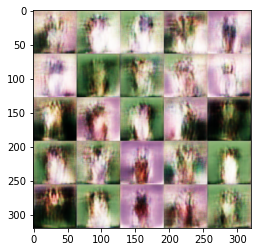

 30%|██▉       | 300/1001 [01:02<02:10,  5.39it/s]

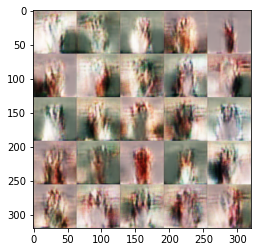

 35%|███▍      | 350/1001 [01:12<02:02,  5.30it/s]

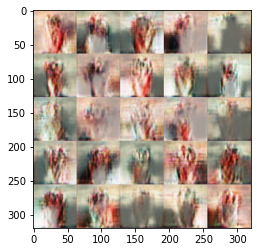

 40%|███▉      | 400/1001 [01:22<01:53,  5.29it/s]

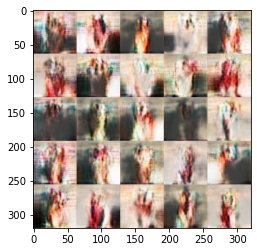

 45%|████▍     | 450/1001 [01:32<01:45,  5.24it/s]

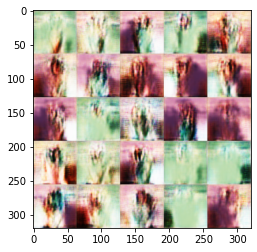

 50%|████▉     | 500/1001 [01:42<01:35,  5.24it/s]

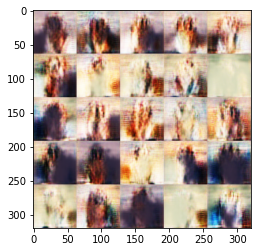

 55%|█████▍    | 550/1001 [01:51<01:26,  5.22it/s]

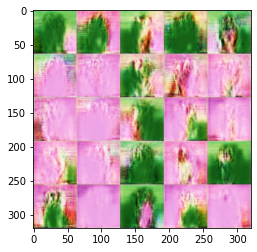

 60%|█████▉    | 600/1001 [02:01<01:19,  5.06it/s]

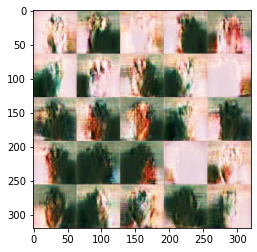

 65%|██████▍   | 650/1001 [02:11<01:07,  5.21it/s]

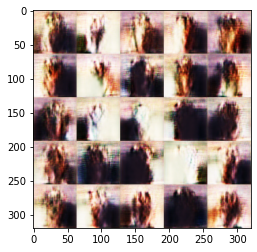

 70%|██████▉   | 700/1001 [02:21<00:58,  5.17it/s]

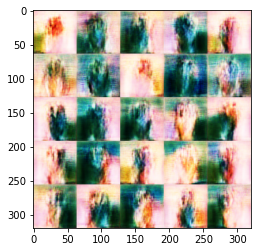

 75%|███████▍  | 750/1001 [02:31<00:49,  5.03it/s]

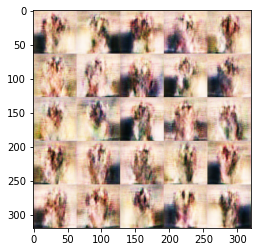

 80%|███████▉  | 800/1001 [02:42<00:38,  5.22it/s]

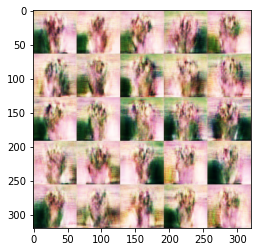

 85%|████████▍ | 850/1001 [02:52<00:30,  5.03it/s]

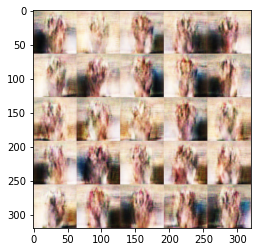

 90%|████████▉ | 900/1001 [03:02<00:20,  4.93it/s]

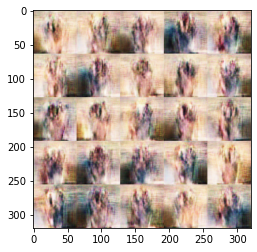

 95%|█████████▍| 950/1001 [03:12<00:10,  4.94it/s]

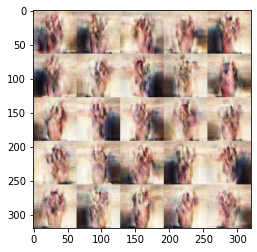

100%|█████████▉| 1000/1001 [03:23<00:00,  4.92it/s]

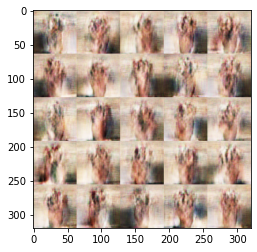

100%|██████████| 1001/1001 [03:23<00:00,  4.92it/s]


In [ ]:
csvlist = []
csvlist.append([])
csvlist[0].append("step")
csvlist[0].append("g_loss")
csvlist[0].append("d_loss")

for i in tqdm(range(EPOCHS)):
  batch_images = image_batch(BATCH_SIZE)
  noise = np.random.uniform(size=[BATCH_SIZE, 100], low=-1.0, high=1.0)
  generated_images = generator.predict(noise)
  X = np.concatenate((batch_images, generated_images))
  y = [1] * BATCH_SIZE + [0] * BATCH_SIZE
  d_loss = discriminator.train_on_batch(X, y)
  noise = np.random.uniform(size=[BATCH_SIZE, 100], low=-1.0, high=1.0)
  g_loss = discriminator_on_generator.train_on_batch(noise, [1] * BATCH_SIZE)

  csvlist.append([])
  csvlist[i + 1].append(i)
  csvlist[i + 1].append(g_loss)
  csvlist[i + 1].append(d_loss)

  if i % EACH_STEP == 0:
    image = combine_images(generated_images)
    plt.ion()
    plt.imshow(image)
    plt.pause(0.001)
    image.save(GEN_IMAGE_DIR + "/gen%05d.png" % i)

with open("./train_graph.csv", "w") as f:
  data_writer = csv.writer(f)
  data_writer.writerows(csvlist)

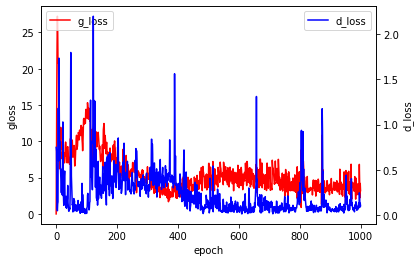

In [ ]:
data = pd.read_csv("train_graph.csv", index_col="step")
fig, ax1 = plt.subplots()
df_acc = data.iloc[:, [0]]
df_val_acc = data.iloc[:, [1]]

ax1.plot(df_acc, "r", label = "g_loss")
ax1.set_xlabel("epoch")
ax1.set_ylabel("gloss")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(df_val_acc, "b", label="d_loss")
ax2.set_ylabel("d_loss")
ax2.legend(loc="upper right")
plt.show()